In [1]:
import numpy as np
from numpy.random import multivariate_normal as mn
from scipy.stats import multivariate_normal as smn
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
brown = np.array([[7,4    ], [39,7   ], [79,8   ], [119,8  ], [160,8  ], [212,9  ], [262,10 ], [318,11 ], [346,10 ],
                  [292,12 ], [350,36 ], [323,38 ], [291,40 ], [262,42 ], [221,43 ], [177,44 ], [132,45 ], [103,45 ],
                  [50,45  ], [20,45  ], [12,69  ], [13,89  ], [56,81  ], [94,81  ], [125,81 ], [175,83 ], [214,86 ],
                  [235,87 ], [268,81 ], [302,78 ], [346,76 ], [329,81 ], [349,91 ], [351,107], [338,117], [324,108],
                  [255,112], [254,113], [212,119], [169,120], [104,122], [63,124 ], [41,132 ], [33,152 ], [29,163 ],
                  [75,159 ], [88,152 ], [131,151], [162,153], [191,155], [234,156], [257,156], [288,156], [321,158],
                  [345,155], [312,133], [283,120], [348,136], [359,176], [365,192], [367,211], [373,229], [379,247],
                  [380,267], [376,284], [360,294], [332,295], [332,295], [321,283], [314,259], [302,240], [297,220],
                  [286,205], [286,189], [305,184], [329,183], [328,203], [322,205], [339,234], [355,255], [367,248],
                  [269,189], [219,194], [186,197], [161,193], [125,193], [103,196], [77,197 ], [43,195 ], [22,227 ],
                  [20,258 ], [51,236 ], [104,228], [141,224], [177,223], [35,277 ], [19,315 ], [19,335 ], [51,324 ],
                  [77,308 ], [105,292], [138,277], [189,250], [214,224], [246,203], [108,251], [77,266 ], [63,284 ],
                  [490,8  ], [521,9  ], [548,10 ], [565,19 ], [565,34 ], [556,44 ], [538,44 ], [520,43 ], [502,47 ],
                  [488,53 ], [485,66 ], [487,82 ], [504,82 ], [538,82 ], [568,80 ], [567,91 ], [560,99 ], [536,107],
                  [519,109], [504,111], [495,117], [483,140], [479,107], [479,85 ], [481,36 ], [488,24 ], [522,35 ],
                  [505,29 ], [540,26 ], [525,68 ], [484,158], [489,176], [484,194], [492,215], [495,225], [504,252],
                  [514,272], [519,286], [525,303], [533,319], [546,341], [561,357], [560,344], [562,311], [562,287],
                  [560,246], [563,223], [567,181], [567,148], [561,123], [531,123], [514,131], [506,156], [508,135],
                  [533,163], [546,137], [548,198], [548,246], [545,289], [543,259], [522,211], [522,231], [545,218],
                  [551,164], [522,137], [500,155], [515,182]])

In [3]:
blue = np.array([[378,7  ], [388,7  ], [413,6  ], [429,6  ], [465,10 ], [461,19 ],[458,41 ],[459,59 ],[459,76 ],[459,104],[454,126],[460,154],[465,174],[466,195],[472,218],[477,239],[487,255],[494,270],[499,287],
[505,303],[512,318],[520,328],[527,348],[534,365],[553,380],[563,394],[374,17 ],[373,39 ],[371,62 ],[374,83 ],[371,102],[373,122],[378,141],[382,164],[387,178],[392,208],[393,194],[400,219],[404,235],
[408,252],[406,272],[402,293],[390,304],[386,310],[362,319],[376,316],[345,320],[324,319],[309,310],[300,294],[296,278],[290,261],[287,249],[279,233],[274,227],[263,219],[249,218],[244,230],[235,245],
[222,255],[216,267],[197,277],[186,285],[174,291],[163,298],[155,303],[138,312],[113,317],[102,328],[80,330 ],[69,344 ],[57,342 ],[51,350 ],[41,352 ],[28,362 ],[16,376 ],[244,246],[266,242],[254,237],
[226,271],[250,270],[268,264],[274,278],[274,293],[246,293],[224,293],[198,300],[170,318],[238,313],[243,313],[301,316],[270,314],[287,302],[197,325],[151,324],[107,343],[192,340],[204,340],[280,341],
[307,342],[373,343],[396,343],[419,343],[453,344],[465,344],[393,25 ],[409,29 ],[437,24 ],[432,46 ],[407,53 ],[386,64 ],[401,81 ],[418,72 ],[429,80 ],[439,91 ],[427,129],[413,98 ],[421,104],[397,120],
[402,150],[424,152],[449,161],[450,178],[427,172],[415,179],[420,204],[427,207],[447,218],[448,206],[443,245],[432,249],[464,273],[439,302],[416,308],[430,268],[438,280],[478,284],[477,295],[489,313],
[456,318],[434,327],[415,327],[454,297],[458,249],[36,371 ],[91,365 ],[138,366],[225,370],[257,371],[324,373],[356,373],[420,372],[438,372],[483,374],[504,383],[541,401],[519,412],[456,410],[436,411],
[374,413],[349,414],[302,416],[257,416],[211,416],[156,419],[110,422],[46,420 ],[45,444 ],[45,469 ],[53,473 ],[110,475],[147,475],[283,477],[321,477],[377,478],[442,479],[474,481],[509,476],[533,493],
[508,506],[412,507],[358,508],[282,508],[222,508],[124,505],[85,509 ],[53,512 ],[80,446 ],[87,392 ],[39,406 ],[186,451],[288,451],[213,457],[246,444],[246,443],[404,442],[366,450],[477,449],[486,418],
[524,449],[548,440],[554,484],[557,502],[493,511],[424,510],[444,507],[328,452],[270,501],[168,479],[186,499],[256,481],[224,470],[225,486],[185,400],[168,389],[183,371],[125,390]])

In [4]:
w, h = 573, 530

In [5]:
brown = np.hstack((brown, np.zeros(shape=(brown.shape[0], 1))))
blue = np.hstack((blue, np.ones(shape=(blue.shape[0], 1))))

In [6]:
points = np.vstack((blue, brown))
points[:,1] = 5 * (h - points[:,1]) / h - 2
points[:,0] = 5 * points[:,0] / w - 2

In [7]:
#plt.scatter(points[points[:,2] == 1][:,0], points[points[:,2] == 1][:,1])
#plt.scatter(points[points[:,2] == 0][:,0], points[points[:,2] == 0][:,1])

In [8]:
I = np.eye(2)
best_blue_means, best_brown_means, best_a_s = None, None, 0

while True:
    blue_means = mn((1, 0), I, 10)
    brown_means = mn((0, 1), I, 10)
    pblue = np.zeros(points.shape[0])
    pbrown = np.zeros(points.shape[0])
    for i in range(10):
        pblue += smn.pdf(points[:,:2], mean=blue_means[i], cov=I/5)
        pbrown += smn.pdf(points[:,:2], mean=brown_means[i], cov=I/5)
    a_s = accuracy_score(points[:,2], 0+(pblue>pbrown))
    if a_s > best_a_s:
        best_blue_means, best_brown_means, best_a_s = blue_means, brown_means, a_s
        print(best_a_s)
#blue_points = np.vstack([mn(blue_means[i], I/5, 10) for i in range(10)])
#brown_points = np.vstack([mn(brown_means[i], I/5, 10) for i in range(10)])

0.625
0.6454081632653061
0.7295918367346939
0.7448979591836735
0.7602040816326531
0.7806122448979592
0.8571428571428571
0.8622448979591837
0.8826530612244898
0.8903061224489796
0.8954081632653061
0.9336734693877551


KeyboardInterrupt: 

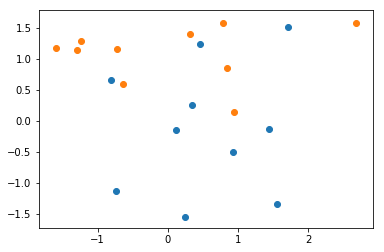

In [14]:
plt.scatter(best_blue_means[:,0], best_blue_means[:,1])
plt.scatter(best_brown_means[:,0], best_brown_means[:,1])
#plt.scatter(blue_points[:,0], blue_points[:,1])
#plt.scatter(brown_points[:,0], brown_points[:,1])

In [32]:
#plt.scatter(points[pblue>pbrown][:,0], points[pblue>pbrown][:,1])
#plt.scatter(points[pblue<pbrown][:,0], points[pblue<pbrown][:,1])

In [31]:
accuracy_score(points[:,2], 0+(pblue>pbrown))

0.7448979591836735

In [42]:
best_blue_means, best_brown_means, best_a_s

(array([[-0.76984456,  0.68481421],
        [ 1.31595023, -0.01524395],
        [-0.79998303, -1.25341062],
        [ 0.1273859 , -1.59067228],
        [ 0.47416484,  0.46370937],
        [ 1.44923019, -1.25015962],
        [ 0.38579432,  1.09808155],
        [ 0.79655758, -0.46856294],
        [ 0.14509522, -0.21230019],
        [ 1.63124273,  1.50124375]]), array([[-0.6227393 ,  0.7150955 ],
        [ 0.82851254,  0.57659957],
        [ 0.34909186,  1.38040508],
        [ 2.73571771,  1.50710081],
        [-1.2294235 ,  1.44724384],
        [ 0.74378907,  1.47081486],
        [-1.55691576,  1.17149161],
        [ 1.01165209,  0.07333176],
        [-1.36259986,  1.19934271],
        [-0.81420616,  1.32166231]]), 0.9872448979591837)

In [40]:
pblue = np.zeros(points.shape[0])
pbrown = np.zeros(points.shape[0])
for i in range(10):
    pblue += smn.pdf(points[:,:2], mean=best_blue_means[i], cov=I/5)
    pbrown += smn.pdf(points[:,:2], mean=best_brown_means[i], cov=I/5)

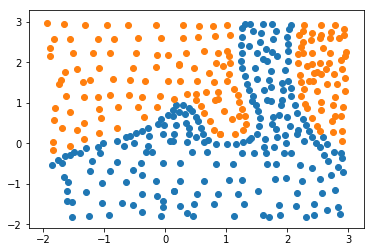

In [41]:
plt.scatter(points[pblue>pbrown][:,0], points[pblue>pbrown][:,1])
plt.scatter(points[pblue<pbrown][:,0], points[pblue<pbrown][:,1])

In [38]:
while True:
    blue_means = best_blue_means + mn((0, 0), I/100000, 10)
    brown_means = best_brown_means + mn((0, 0), I/100000, 10)
    pblue = np.zeros(points.shape[0])
    pbrown = np.zeros(points.shape[0])
    for i in range(10):
        pblue += smn.pdf(points[:,:2], mean=blue_means[i], cov=I/5)
        pbrown += smn.pdf(points[:,:2], mean=brown_means[i], cov=I/5)
    a_s = accuracy_score(points[:,2], 0+(pblue>pbrown))
    if a_s > best_a_s:
        best_blue_means, best_brown_means, best_a_s = blue_means, brown_means, a_s
        print(best_a_s)

KeyboardInterrupt: 

In [39]:
best_blue_means, best_brown_means, best_a_s

(array([[-0.76984456,  0.68481421],
        [ 1.31595023, -0.01524395],
        [-0.79998303, -1.25341062],
        [ 0.1273859 , -1.59067228],
        [ 0.47416484,  0.46370937],
        [ 1.44923019, -1.25015962],
        [ 0.38579432,  1.09808155],
        [ 0.79655758, -0.46856294],
        [ 0.14509522, -0.21230019],
        [ 1.63124273,  1.50124375]]), array([[-0.6227393 ,  0.7150955 ],
        [ 0.82851254,  0.57659957],
        [ 0.34909186,  1.38040508],
        [ 2.73571771,  1.50710081],
        [-1.2294235 ,  1.44724384],
        [ 0.74378907,  1.47081486],
        [-1.55691576,  1.17149161],
        [ 1.01165209,  0.07333176],
        [-1.36259986,  1.19934271],
        [-0.81420616,  1.32166231]]), 0.9872448979591837)